In [124]:
import numpy as np

from sklearn.neighbors import LocalOutlierFactor as LOF

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## PART 1: Example

In [4]:
# data points
X = np.array([[0,0],[0,1],[1,0],[100,100]])

clf = LOF(n_neighbors=2)
y_pred = clf.fit_predict(X)

print(y_pred)
print(clf.negative_outlier_factor_)

[ 1  1  1 -1]
[  -1.17157288   -0.9267767    -0.9267767  -116.57297289]


## PART 2: Outlier Detection

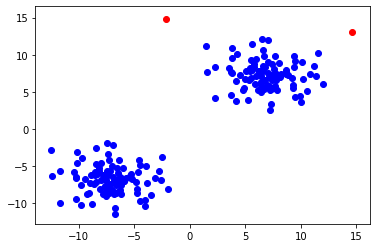

In [58]:
np.random.seed(265)

X_inliers = np.random.randn(100,2)*2
X_inliers = np.r_[X_inliers+7, X_inliers-7]
n_inliers = len(X_inliers)

X_outliers = np.random.uniform(low=-15, high=15, size=(2,2))
n_outliers = len(X_outliers)

X = np.r_[X_inliers, X_outliers]
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

#visualize
plt.figure(1)
plt.scatter(X_inliers[:,0], X_inliers[:,1], color='b')
plt.scatter(X_outliers[:,0], X_outliers[:,1], color = 'r')
plt.show()

In [59]:
lof_parameters = np.linspace(5,100,20, dtype=int)
FPs = []
errors = []

for n_neighb in lof_parameters:
    lof = LOF(n_neighbors=n_neighb, contamination = n_outliers/n_inliers)
    y_pred = lof.fit_predict(X)
    
    y_train = y_pred[:n_inliers]
    y_test = y_pred[-n_outliers:]
    FP = (y_test[y_test == 1].size)/n_outliers
    FPs.append(FP)
    
    errors.append((y_pred != ground_truth).sum())


#print('Best no. of neighbors is', best_n_neighbors)
print('Minimum FP is %.2f, with no. of neighbors = %d'% (np.min(FPs), lof_parameters[np.argmin(FPs)]))
print('Minimum number of errors is %.2f, with no. of neighbors = %d'% (np.min(errors), lof_parameters[np.argmin(errors)]))


Minimum FP is 0.00, with no. of neighbors = 5
Minimum number of errors is 0.00, with no. of neighbors = 5


In [60]:
print(errors)
print(FPs)

[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [61]:
best_n_neighbors = lof_parameters[np.argmin(FPs)]
print(best_n_neighbors)
best_lof = LOF(n_neighbors=best_n_neighbors, contamination = n_outliers/n_inliers)
y_pred = best_lof.fit_predict(X)

5


In [62]:
n_errors = (y_pred != ground_truth).sum()
X_scores = best_lof.negative_outlier_factor_

y_train = y_pred[:n_inliers]
y_test = y_pred[-n_outliers:]

TP = (y_train[y_train == 1].size)/n_inliers
TN = (y_train[y_train == -1].size)/n_inliers

FP = (y_test[y_test == 1].size)/n_outliers
FN = (y_test[y_test == -1].size)/n_outliers

print("TP: %.2f , TN: %.2f" %(TP,TN))
print("FP: %.2f , FN: %.2f" %(FP,FN))

TP: 1.00 , TN: 0.00
FP: 0.00 , FN: 1.00


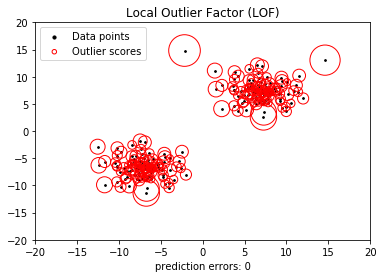

In [63]:
plt.title('Local Outlier Factor (LOF)')
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to thr outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000*radius, edgecolors='r',
    facecolors='none', label='Outlier scores')

plt.axis('tight')
plt.xlim((-20, 20))
plt.ylim((-20, 20))
plt.xlabel("prediction errors: %d"%(n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()


## PART 3: Anomally Detection

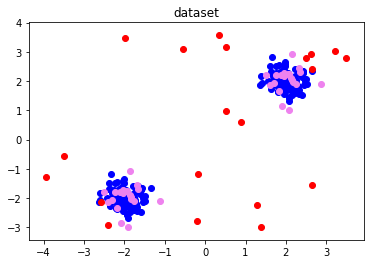

In [141]:
xx, yy = np.meshgrid(np.linspace(-5,5,500), np.linspace(-5,5,500))

np.random.seed(1153515314)

# normal training dataset
X = np.random.randn(100,2)*0.3
X_train = np.r_[X-2, X+2]

# normal test points
X = np.random.randn(20,2)*0.3
X_test = np.r_[X-2, X+2]

# generate some anomallies
X_novelty = np.random.uniform(low=-4, high=4, size=(20,2))

#make some plots
plt.figure(1)
plt.title("dataset")
plt.scatter(X_train[:,0], X_train[:,1], color = 'b')
plt.scatter(X_test[:, 0], X_test[:, 1], color = 'violet')
plt.scatter(X_novelty[:,0], X_novelty[:,1], color = 'r')
plt.show()

In [142]:
'''
lof_parameters = np.linspace(5,100,20, dtype=int)
FPs = []
TNs = []

for n_neighb in lof_parameters:
    lof = LOF(n_neighbors=n_neighb, novelty=True)
    lof.fit(X_train)

    y_test_pred = lof.predict(X_test)
    y_novelty_pred = lof.predict(X_novelty)

    TNs.append(y_test_pred[y_test_pred == -1].size/y_test_pred.size)
    FPs.append(y_novelty_pred[y_novelty_pred == 1].size/y_novelty_pred.size)


best_FP = np.min(FPs)
best_TN = np.min(TNs)

print('best test error is %.2f with no. of neightbors = %d'% (best_TN, lof_parameters[np.argmin(TNs)]))
print('best outlier detection error is %.2f with no. of neightbors = %d' %(best_FP, lof_parameters[np.argmin(FPs)]))
'''



"\nlof_parameters = np.linspace(5,100,20, dtype=int)\nFPs = []\nTNs = []\n\nfor n_neighb in lof_parameters:\n    lof = LOF(n_neighbors=n_neighb, novelty=True)\n    lof.fit(X_train)\n\n    y_test_pred = lof.predict(X_test)\n    y_novelty_pred = lof.predict(X_novelty)\n\n    TNs.append(y_test_pred[y_test_pred == -1].size/y_test_pred.size)\n    FPs.append(y_novelty_pred[y_novelty_pred == 1].size/y_novelty_pred.size)\n\n\nbest_FP = np.min(FPs)\nbest_TN = np.min(TNs)\n\nprint('best test error is %.2f with no. of neightbors = %d'% (best_TN, lof_parameters[np.argmin(TNs)]))\nprint('best outlier detection error is %.2f with no. of neightbors = %d' %(best_FP, lof_parameters[np.argmin(FPs)]))\n"

In [143]:
lof = LOF(n_neighbors=20, novelty=True)

lof.fit(X_train)
y_test_pred = lof.predict(X_test)
y_novelty_pred = lof.predict(X_novelty)

test_error = y_test_pred[y_test_pred == -1].size/y_test_pred.size
novelty_detection_error = y_novelty_pred[y_novelty_pred == 1].size/y_novelty_pred.size

print(test_error)
print(novelty_detection_error)

0.2
0.1


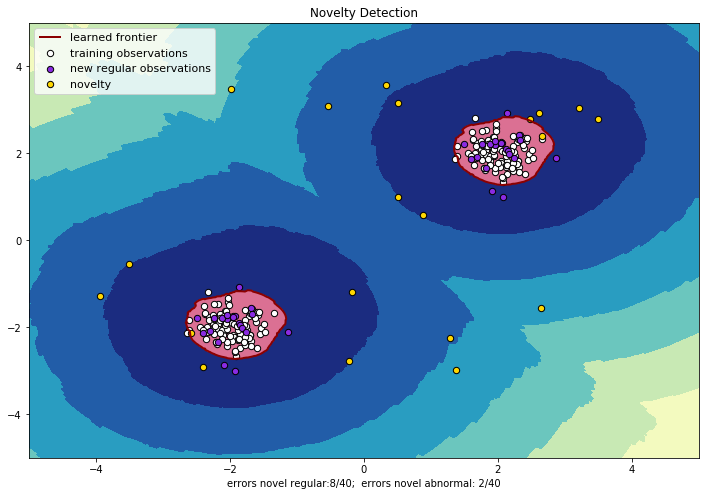

In [147]:
# make some plot

Z = lof.decision_function(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12,8))

plt.title("Novelty Detection")
plt.contourf(xx,yy, Z, levels=np.linspace(Z.min(),0,7),cmap=plt.cm.YlGnBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s=40
b = plt.scatter(X_train[:,0], X_train[:,1], c = 'white', s=s, edgecolor='black')
c = plt.scatter(X_test[:, 0], X_test[:, 1], c = 'blueviolet', s=s, edgecolor='black')
d = plt.scatter(X_novelty[:,0], X_novelty[:,1], c = 'gold', s=s, edgecolor='black')

plt.axis('tight')
plt.xlim((-5,5))
plt.ylim((-5,5))

plt.legend([a.collections[0], b, c, d],
           ["learned frontier", "training observations", "new regular observations", "novelty"],
            loc='upper left',
           prop=matplotlib.font_manager.FontProperties(size=11)
          )

plt.xlabel("errors novel regular:%d/40;  errors novel abnormal: %d/40"
    %(y_test_pred[y_test_pred == -1].size, y_novelty_pred[y_novelty_pred == 1].size))
plt.show()